# Data cleaning and feature engineering

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA as sklearnPCA

In [2]:
df= pd.read_csv("../MLG_customer_segmentation/data/card_transactions.csv")
df.head()

customer_id  balance_account  purchases_amount  paid_advance  \
0  tGEg8fT2eCgVxdwS         9.298409            107.60      0.000000   
1  stEDu20sSKOXomjg        52.666422            150.30      0.000000   
2  CEB2blrN3b88GsRe      1360.795674              0.00    462.861443   
3  0N0eBl8ySaZThxKE      2021.641161            363.18      0.000000   
4  6NLauoHUwtwOv4Wy        22.322374             95.00   1162.045833   

   full_purchases  balance_frequency_update  installments  \
0            0.00                  0.909091         107.6   
1            0.00                  1.000000         150.3   
2            0.00                  1.000000           0.0   
3          363.18                  1.000000           0.0   
4           95.00                  0.363636           0.0   

   purchases_frequency  full_purchases_frequency  \
0             0.909091                  0.000000   
1             1.000000                  0.000000   
2             0.000000                  0.000000   
3             1.000000                  1.000000   
4             0.083333                  0.083333   

   purchases_installments_frequency  cash_advance_frequency  nr_cash_advances  \
0                          0.818182                0.000000                 0   
1                          0.833333                0.000000                 0   
2                          0.000000                0.272727                 6   
3                          0.000000                0.000000                 0   
4                          0.000000                0.166667                 3   

   nr_purchases  credit_limit  fixed_rate_period     payments  min_payments  \
0            10        1000.0                 11    89.868853     89.711672   
1             6        1000.0                  6    54.722514     82.955180   
2             0        1500.0                 11   303.031979    443.781316   
3            13        2000.0                 12   704.240770    795.859808   
4             1        2500.0                 12  4094.261427     40.142262   

   full_payment_prc  
0          0.428571  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000

In [36]:
print(df.shape)
df.describe()

(8500, 23)


balance_account  purchases_amount  paid_advance  full_purchases  \
count      8500.000000       8500.000000   8500.000000     8500.000000   
mean       1565.941403        999.561312    973.508540      588.165365   
std        2090.513302       2154.189460   2078.539061     1669.466184   
min           0.000000          0.000000      0.000000        0.000000   
25%         126.318369         39.000000      0.000000        0.000000   
50%         869.046468        360.000000      0.000000       37.400000   
75%        2053.674410       1105.897500   1113.726110      570.410000   
max       19043.138560      49039.570000  47137.211760    40761.250000   

       balance_frequency_update  installments  purchases_frequency  \
count               8500.000000   8500.000000          8500.000000   
mean                   0.876272    411.708492             0.489383   
std                    0.237517    910.142440             0.401075   
min                    0.000000      0.000000             0.000000   
25%                    0.875000      0.000000             0.083333   
50%                    1.000000     89.000000             0.500000   
75%                    1.000000    466.725000             0.916667   
max                    1.000000  22500.000000             1.000000   

       full_purchases_frequency  purchases_installments_frequency  \
count               8500.000000                       8500.000000   
mean                   0.201940                          0.363796   
std                    0.297756                          0.397162   
min                    0.000000                          0.000000   
25%                    0.000000                          0.000000   
50%                    0.083333                          0.166667   
75%                    0.285714                          0.750000   
max                    1.000000                          1.000000   

       cash_advance_frequency  ...  credit_limit  fixed_rate_period  \
count             8500.000000  ...   8499.000000        8500.000000   
mean                 0.135288  ...   4485.848704          11.516118   
std                  0.200892  ...   3629.804040           1.339121   
min                  0.000000  ...     50.000000           6.000000   
25%                  0.000000  ...   1500.000000          12.000000   
50%                  0.000000  ...   3000.000000          12.000000   
75%                  0.222222  ...   6500.000000          12.000000   
max                  1.500000  ...  30000.000000          12.000000   

           payments  min_payments  full_payment_prc  payment_ratio  \
count   8500.000000   8202.000000       8500.000000    8202.000000   
mean    1721.250989    865.594683          0.152587       9.562716   
std     2893.200899   2389.297977          0.291505     123.418492   
min        0.000000      0.019163          0.000000       0.000730   
25%      381.893717    168.712104          0.000000       0.957017   
50%      851.146952    310.399040          0.000000       2.159274   
75%     1897.014052    826.426929          0.142857       6.268846   
max    50721.483360  76406.207520          1.000000    6840.528861   

               CUR  avg_purchase_amt  full_payment_ratio  kmeans_cluster  
count  8499.000000       8500.000000         8500.000000     8500.000000  
mean     38.888128         73.841534            0.001526        0.494471  
std      39.221435        161.210946            0.002915        0.779392  
min       0.000000          0.000000            0.000000        0.000000  
25%       4.129361         12.120000            0.000000        0.000000  
50%      30.114090         41.283811            0.000000        0.000000  
75%      71.882344         78.744185            0.001429        1.000000  
max    1590.995114       5981.666667            0.010000        2.000000  

[8 rows x 22 columns]

In [11]:
df.isnull().any()

customer_id                         False
balance_account                     False
purchases_amount                    False
paid_advance                        False
full_purchases                      False
balance_frequency_update            False
installments                        False
purchases_frequency                 False
full_purchases_frequency            False
purchases_installments_frequency    False
cash_advance_frequency              False
nr_cash_advances                    False
nr_purchases                        False
credit_limit                         True
fixed_rate_period                   False
payments                            False
min_payments                         True
full_payment_prc                    False
dtype: bool

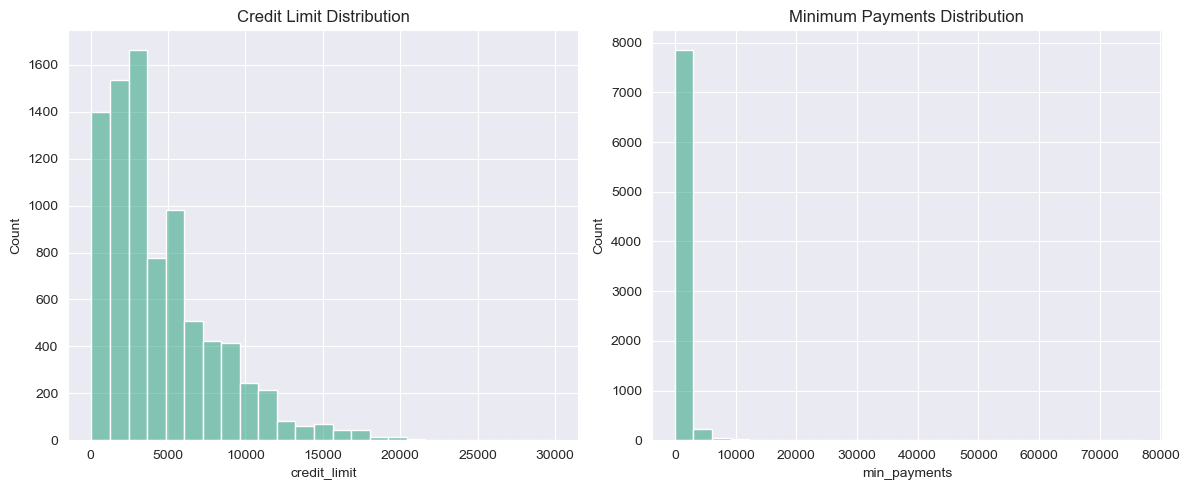

In [199]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first histogram
sns.histplot(df["credit_limit"], ax=axes[0], color="#1b9e77", alpha=0.5,
            bins=25)
axes[0].set_title("Credit Limit Distribution")

# Plot the second histogram
sns.histplot(df["min_payments"], ax=axes[1], color="#1b9e77", alpha=0.5,
            bins=25)
axes[1].set_title("Minimum Payments Distribution")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### distributions are skewed so we can fill the NAs with the median

## Feature engineering

In [3]:
# Payment-to-Minimum Payment Ratio-A low ratio indicates that the customer is only paying the minimum, which can lead to accumulating debt.
df["payment_ratio"]= df["payments"] / df["min_payments"]
# Credit Utilization Ratio (CUR)-A high CUR can indicate financial stress and increased risk of default.
df["CUR"]= (df["balance_account"] / df["credit_limit"]) * 100
#Average Purchase Amount-identify big vs. small spenders
df["avg_purchase_amt"]= df["purchases_amount"] / df["nr_purchases"]
#Full Payment Ratio- convert full_payment_prc to ratio- proportion of payments made in full- indicates responsible credit usage
df["full_payment_ratio"]= df["full_payment_prc"] / 100

#replace inf values with NaN then fill NA with 0
df["avg_purchase_amt"] = df["avg_purchase_amt"].replace([np.inf, -np.inf], np.nan)
##filling NA values in this column with 0, some customers did not make any purchases
df['avg_purchase_amt'] = df['avg_purchase_amt'].fillna(0)
df.head()

customer_id  balance_account  purchases_amount  paid_advance  \
0  tGEg8fT2eCgVxdwS         9.298409            107.60      0.000000   
1  stEDu20sSKOXomjg        52.666422            150.30      0.000000   
2  CEB2blrN3b88GsRe      1360.795674              0.00    462.861443   
3  0N0eBl8ySaZThxKE      2021.641161            363.18      0.000000   
4  6NLauoHUwtwOv4Wy        22.322374             95.00   1162.045833   

   full_purchases  balance_frequency_update  installments  \
0            0.00                  0.909091         107.6   
1            0.00                  1.000000         150.3   
2            0.00                  1.000000           0.0   
3          363.18                  1.000000           0.0   
4           95.00                  0.363636           0.0   

   purchases_frequency  full_purchases_frequency  \
0             0.909091                  0.000000   
1             1.000000                  0.000000   
2             0.000000                  0.000000   
3             1.000000                  1.000000   
4             0.083333                  0.083333   

   purchases_installments_frequency  ...  nr_purchases  credit_limit  \
0                          0.818182  ...            10        1000.0   
1                          0.833333  ...             6        1000.0   
2                          0.000000  ...             0        1500.0   
3                          0.000000  ...            13        2000.0   
4                          0.000000  ...             1        2500.0   

   fixed_rate_period     payments  min_payments  full_payment_prc  \
0                 11    89.868853     89.711672          0.428571   
1                  6    54.722514     82.955180          0.000000   
2                 11   303.031979    443.781316          0.000000   
3                 12   704.240770    795.859808          0.000000   
4                 12  4094.261427     40.142262          0.000000   

   payment_ratio         CUR  avg_purchase_amt  full_payment_ratio  
0       1.001752    0.929841         10.760000            0.004286  
1       0.659664    5.266642         25.050000            0.000000  
2       0.682841   90.719712          0.000000            0.000000  
3       0.884880  101.082058         27.936923            0.000000  
4     101.993790    0.892895         95.000000            0.000000  

[5 rows x 22 columns]

In [4]:
## separate labels, impute missing values
df_labels= df["customer_id"]
df_num= df.drop("customer_id", axis="columns")

# Calculate the median for each column
medians = df_num.median()
# Impute missing values using the calculated medians
df_num = df_num.fillna(medians)
df_num.isnull().any()

balance_account                     False
purchases_amount                    False
paid_advance                        False
full_purchases                      False
balance_frequency_update            False
installments                        False
purchases_frequency                 False
full_purchases_frequency            False
purchases_installments_frequency    False
cash_advance_frequency              False
nr_cash_advances                    False
nr_purchases                        False
credit_limit                        False
fixed_rate_period                   False
payments                            False
min_payments                        False
full_payment_prc                    False
payment_ratio                       False
CUR                                 False
avg_purchase_amt                    False
full_payment_ratio                  False
dtype: bool

In [7]:
df_num.head()

balance_account  purchases_amount  paid_advance  full_purchases  \
0         9.298409            107.60      0.000000            0.00   
1        52.666422            150.30      0.000000            0.00   
2      1360.795674              0.00    462.861443            0.00   
3      2021.641161            363.18      0.000000          363.18   
4        22.322374             95.00   1162.045833           95.00   

   balance_frequency_update  installments  purchases_frequency  \
0                  0.909091         107.6             0.909091   
1                  1.000000         150.3             1.000000   
2                  1.000000           0.0             0.000000   
3                  1.000000           0.0             1.000000   
4                  0.363636           0.0             0.083333   

   full_purchases_frequency  purchases_installments_frequency  \
0                  0.000000                          0.818182   
1                  0.000000                          0.833333   
2                  0.000000                          0.000000   
3                  1.000000                          0.000000   
4                  0.083333                          0.000000   

   cash_advance_frequency  ...  nr_purchases  credit_limit  fixed_rate_period  \
0                0.000000  ...            10        1000.0                 11   
1                0.000000  ...             6        1000.0                  6   
2                0.272727  ...             0        1500.0                 11   
3                0.000000  ...            13        2000.0                 12   
4                0.166667  ...             1        2500.0                 12   

      payments  min_payments  full_payment_prc  payment_ratio         CUR  \
0    89.868853     89.711672          0.428571       1.001752    0.929841   
1    54.722514     82.955180          0.000000       0.659664    5.266642   
2   303.031979    443.781316          0.000000       0.682841   90.719712   
3   704.240770    795.859808          0.000000       0.884880  101.082058   
4  4094.261427     40.142262          0.000000     101.993790    0.892895   

   avg_purchase_amt  full_payment_ratio  
0         10.760000            0.004286  
1         25.050000            0.000000  
2          0.000000            0.000000  
3         27.936923            0.000000  
4         95.000000            0.000000  

[5 rows x 21 columns]

In [6]:
##scale numerical data
##drop engineered columns because i dont want them in the clustering, only the visualization
df_no_eng= df_num.drop(["payment_ratio", "CUR", "avg_purchase_amt", "full_payment_ratio"], axis="columns")
df_columns= df_no_eng.columns
data_scaled = StandardScaler().fit_transform(df_no_eng)

##returns a list of lists, not a df
##convert back to a df
dict_scaled={}
for i, col_name in enumerate(df_columns):
    dict_scaled[col_name] = data_scaled[:, i]
    
df_scaled = pd.DataFrame(dict_scaled)
df_scaled.head()

balance_account  purchases_amount  paid_advance  full_purchases  \
0        -0.744666         -0.414083     -0.468389       -0.352328   
1        -0.723920         -0.394260     -0.468389       -0.352328   
2        -0.098138         -0.464035     -0.245690       -0.352328   
3         0.217997         -0.295433     -0.468389       -0.134773   
4        -0.738436         -0.419933      0.090712       -0.295420   

   balance_frequency_update  installments  purchases_frequency  \
0                  0.138183     -0.334153             1.046519   
1                  0.520953     -0.287234             1.273196   
2                  0.520953     -0.452383            -1.220250   
3                  0.520953     -0.452383             1.273196   
4                 -2.158437     -0.452383            -1.012464   

   full_purchases_frequency  purchases_installments_frequency  \
0                 -0.678245                          1.144149   
1                 -0.678245                          1.182300   
2                 -0.678245                         -0.916043   
3                  2.680406                         -0.916043   
4                 -0.398359                         -0.916043   

   cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
0               -0.673477         -0.474675     -0.187082     -0.960396   
1               -0.673477         -0.474675     -0.347081     -0.960396   
2                0.684186          0.400665     -0.587080     -0.822633   
3               -0.673477         -0.474675     -0.067082     -0.684869   
4                0.156208         -0.037005     -0.547080     -0.547106   

   fixed_rate_period  payments  min_payments  full_payment_prc  
0          -0.385438 -0.563901     -0.322001          0.946810  
1          -4.119450 -0.576049     -0.324877         -0.523476  
2          -0.385438 -0.490219     -0.171277         -0.523476  
3           0.361364 -0.351538     -0.021400         -0.523476  
4           0.361364  0.820251     -0.343102         -0.523476

# Dimensionality reduction to plot in 2D

### PCA

In [8]:
sklearn_pca = sklearnPCA(n_components=2) ## initialize sklearnPCA specifying desired number of PC

components = sklearn_pca.fit_transform(data_scaled)

# Get the list of variance explained by each PC
var_ratio = sklearn_pca.explained_variance_ratio_
var_explained = var_ratio[0] + var_ratio[1]
print(f"Amount of variance explaine by 2 components: {var_explained}")

df_pca= pd.DataFrame({"PC1": components[:, 0],
                      "PC2": components[:, 1]})
df_pca.head()

Amount of variance explaine by 2 components: 0.47611558845315594


PC1       PC2
0 -0.287314 -2.005654
1 -0.687742 -1.702836
2 -1.970388  0.538120
3  0.489399 -0.848035
4 -1.642353 -0.013282

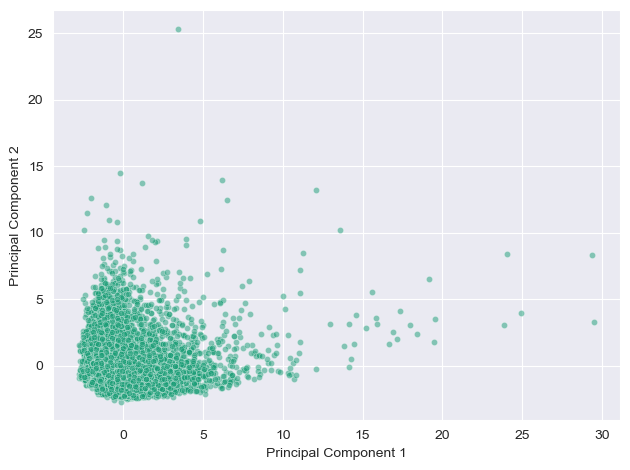

In [9]:
sns.scatterplot(data= df_pca, x="PC1", y="PC2", s=20, alpha=0.5,
           color="#1b9e77")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### UMAP

In [8]:
import umap

In [9]:
umapper = umap.UMAP(n_components=2, random_state=42) ## initialize umap specifying desired number of PC

Y_umap = umapper.fit_transform(data_scaled)## the two principle components to plot

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [10]:
df_umap= pd.DataFrame({"PC1": Y_umap[:, 0],
                      "PC2": Y_umap[:, 1]})

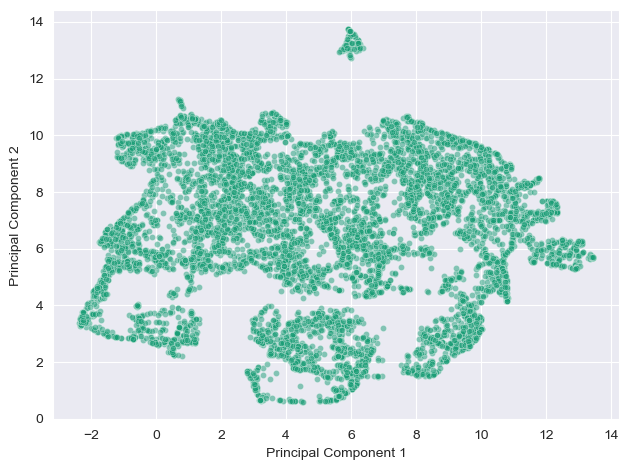

In [11]:
sns.scatterplot(data= df_umap, x="PC1", y="PC2", s=20, alpha=0.5,
           color="#1b9e77")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### TSNE

In [12]:
from sklearn.manifold import TSNE
# t-SNE Definition:
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000)

In [13]:
X_tsne = tsne.fit_transform(data_scaled)
X_tsne

array([[ 11.02136   , -42.843204  ],
       [ -0.31184012, -44.11752   ],
       [-34.279903  ,  45.21434   ],
       ...,
       [-60.438793  , -12.532182  ],
       [ 10.209502  ,   9.316677  ],
       [ 32.451847  ,  -1.7468824 ]], dtype=float32)

In [14]:
df_tsne= pd.DataFrame({"PC1": X_tsne[:, 0],
                      "PC2": X_tsne[:, 1]})

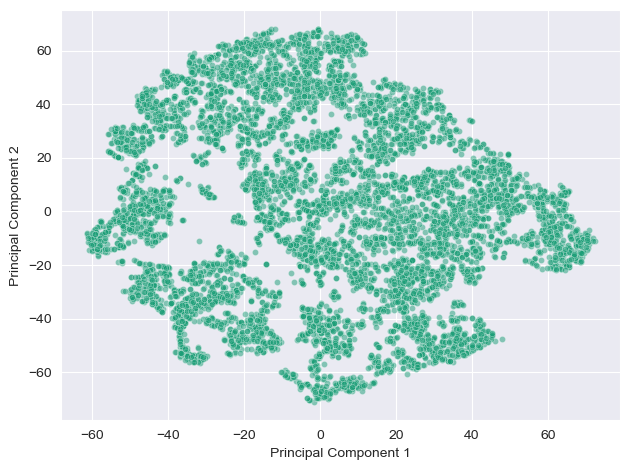

In [15]:
sns.scatterplot(data= df_tsne, x="PC1", y="PC2", s=20, alpha=0.5,
           color="#1b9e77")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## Elbow and silhouette method to determine optimal number of clusters
Using PCA to reduce dimensionality (keeping 95% of variance)

In [16]:
## K_means PCA
## elbow method to select number of clusters
cluster_errors = []

for n_clusters in range(2, 14):
    kmeans_pipeline = Pipeline([
        #("scaler", StandardScaler()), not scaling because data was scaled before PCA
        ("pca", sklearnPCA(0.95)),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=42, verbose=0))])
    kmeans_pipeline.fit(data_scaled) #principle components from above code
    #kmeans_pipeline.predict(df)
    wcsse = kmeans_pipeline.named_steps["cluster"].inertia_
    print('K = ', n_clusters, '\tWCSS Err. = ', wcsse)
    cluster_errors.append(wcsse)

K =  2 	WCSS Err. =  115802.58100411632
K =  3 	WCSS Err. =  100808.38256524855
K =  4 	WCSS Err. =  88471.27825281204
K =  5 	WCSS Err. =  81065.510412815
K =  6 	WCSS Err. =  74800.29829835909
K =  7 	WCSS Err. =  69757.2975899546
K =  8 	WCSS Err. =  65316.17216124493
K =  9 	WCSS Err. =  61954.21590411425
K =  10 	WCSS Err. =  58545.095678398444
K =  11 	WCSS Err. =  54912.22328808902
K =  12 	WCSS Err. =  52808.52812710595
K =  13 	WCSS Err. =  50782.91288142059


In [17]:
# Get the number of components used

n_components = kmeans_pipeline.named_steps["pca"].n_components_

print(f"Number of components to explain 95% variance: {n_components}")

Number of components to explain 95% variance: 12


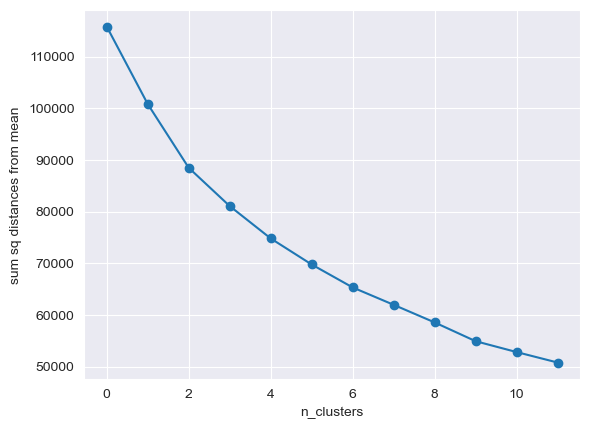

In [18]:
plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

In [19]:
## to help identify the elbow when it is difficult by eye
from kneed import KneeLocator

kl = KneeLocator(
    range(2, 14), cluster_errors, curve="convex", direction="decreasing"
)

kl.elbow

6

In [20]:
## PCA silhouette
silhouette_s = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        #("scaler", StandardScaler()), not scaling because data was scaled before PCA
        ("pca", sklearnPCA(0.95)),
        ("cluster", KMeans(n_clusters=n_clusters))])

    cluster_labels = kmeans_pipeline.fit_predict(data_scaled)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(data_scaled, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(data_scaled, cluster_labels))

For n_clusters = 2 The average silhouette_score is : 0.2091
For n_clusters = 3 The average silhouette_score is : 0.2508
For n_clusters = 4 The average silhouette_score is : 0.2025
For n_clusters = 5 The average silhouette_score is : 0.1927
For n_clusters = 6 The average silhouette_score is : 0.2015
For n_clusters = 7 The average silhouette_score is : 0.2131
For n_clusters = 8 The average silhouette_score is : 0.2203
For n_clusters = 9 The average silhouette_score is : 0.2124
For n_clusters = 10 The average silhouette_score is : 0.2176


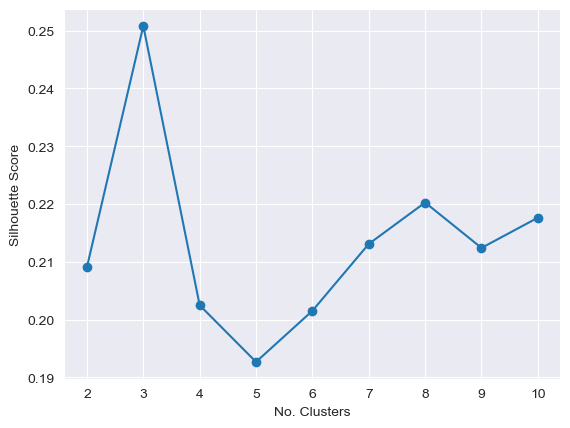

In [21]:
plt.plot(range(2, 11),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [172]:
## Kmeans UMAP
## elbow method

cluster_errors = []
for i in range(1, 14):
    n_clusters = i
    pipe_umap_kmean = Pipeline(
        [
            #("scl", StandardScaler()),
            ("UMAP", umap.UMAP(n_neighbors=30, n_components=100,  min_dist= 0.3, init='random')),
            ("cluster", KMeans(n_clusters=n_clusters, random_state=42, verbose=0))]
    )
    pipe_umap_kmean.fit(data_scaled)
    #kmeans_pipeline.predict(df)
    wcsse = pipe_umap_kmean.named_steps["cluster"].inertia_
    print('K = ', n_clusters, '\tWCSS Err. = ', wcsse)
    cluster_errors.append(wcsse)

K =  1 	WCSS Err. =  92583.4140625
K =  2 	WCSS Err. =  57792.55859375
K =  3 	WCSS Err. =  46620.3515625
K =  4 	WCSS Err. =  38830.9921875
K =  5 	WCSS Err. =  33507.1015625
K =  6 	WCSS Err. =  28784.546875
K =  7 	WCSS Err. =  24882.40234375
K =  8 	WCSS Err. =  21760.908203125
K =  9 	WCSS Err. =  20257.60546875
K =  10 	WCSS Err. =  19142.44921875
K =  11 	WCSS Err. =  17802.15625
K =  12 	WCSS Err. =  16816.2265625
K =  13 	WCSS Err. =  15822.767578125


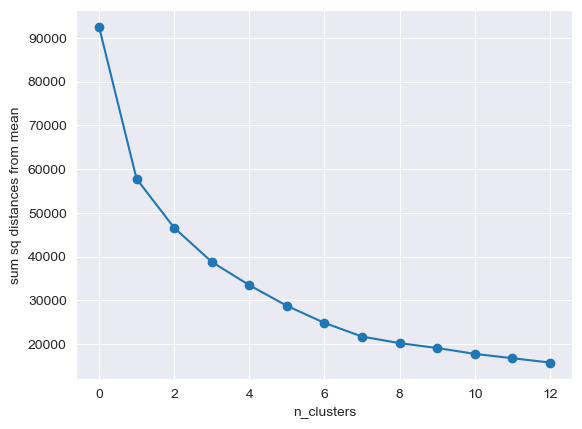

In [173]:
plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

In [174]:
## to help identify the elbow when it is difficult by eye
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 14), cluster_errors, curve="convex", direction="decreasing"
)

kl.elbow

4

In [175]:
## UMAP silhouette
silhouette_s = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        #("scaler", StandardScaler()), not scaling because data was scaled before PCA
        ("UMAP", umap.UMAP(n_neighbors=30, n_components=100,  min_dist= 0.3, init='random')),
        ("cluster", KMeans(n_clusters=n_clusters))])

    cluster_labels = kmeans_pipeline.fit_predict(data_scaled)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(data_scaled, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(data_scaled, cluster_labels))

For n_clusters = 2 The average silhouette_score is : 0.186
For n_clusters = 3 The average silhouette_score is : 0.1543
For n_clusters = 4 The average silhouette_score is : 0.1095
For n_clusters = 5 The average silhouette_score is : 0.1096
For n_clusters = 6 The average silhouette_score is : 0.0495
For n_clusters = 7 The average silhouette_score is : 0.0617
For n_clusters = 8 The average silhouette_score is : 0.0943
For n_clusters = 9 The average silhouette_score is : 0.086
For n_clusters = 10 The average silhouette_score is : 0.0741


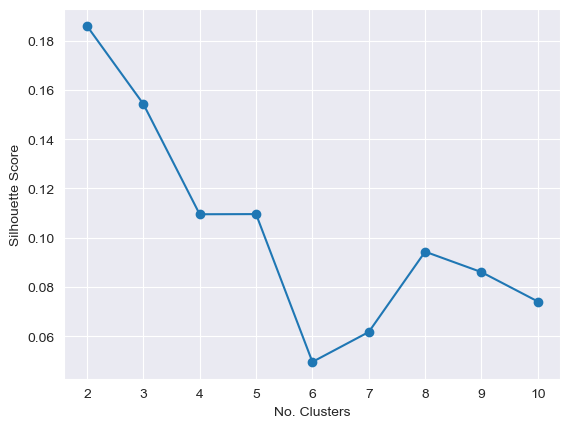

In [176]:
plt.plot(range(2, 11),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

## Run K means with between 3 and 6 clusters

In [10]:
# 3 clusters seemed to be the best

pipe_pca_kmean = Pipeline(
        [
            ("scl", StandardScaler()),
            ("pca", sklearnPCA(0.95)),
            ("cluster", KMeans(n_clusters=3, random_state=42, verbose=0))]
    )

In [11]:
# Fit:
pipe_pca_kmean.fit(data_scaled)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('cluster', KMeans(n_clusters=3, random_state=42))])

In [12]:
df_pca["kmean_pca_labels"]= pipe_pca_kmean.named_steps["cluster"].labels_
df_pca.head()

PC1       PC2  kmean_pca_labels
0 -0.287314 -2.005654                 0
1 -0.687742 -1.702836                 0
2 -1.970388  0.538120                 0
3  0.489399 -0.848035                 0
4 -1.642353 -0.013282                 0

In [13]:
cluster_mapping = {
    0: "Low Spenders",
    1: "High Spenders",
    2: "Cash Advancers"
}

df_pca["cluster"] = df_pca["kmean_pca_labels"].map(cluster_mapping)
df_pca.head()

PC1       PC2  kmean_pca_labels       cluster
0 -0.287314 -2.005654                 0  Low Spenders
1 -0.687742 -1.702836                 0  Low Spenders
2 -1.970388  0.538120                 0  Low Spenders
3  0.489399 -0.848035                 0  Low Spenders
4 -1.642353 -0.013282                 0  Low Spenders

In [26]:
df_tsne["kmean_pca_labels"]= pipe_pca_kmean.named_steps["cluster"].labels_
df_tsne.head()

PC1        PC2  kmean_pca_labels
0  11.021360 -42.843204                 0
1  -0.311840 -44.117519                 0
2 -34.279903  45.214340                 0
3  19.709709  10.801985                 0
4 -40.640865 -26.926327                 0

In [27]:
df_umap["kmean_pca_labels"]= pipe_pca_kmean.named_steps["cluster"].labels_
df_umap.head()


PC1        PC2  kmean_pca_labels
0   0.425172   4.427410                 0
1   0.443990   2.674126                 0
2   9.296197   5.028604                 0
3   3.968133  10.431515                 0
4  10.139967   5.651169                 0

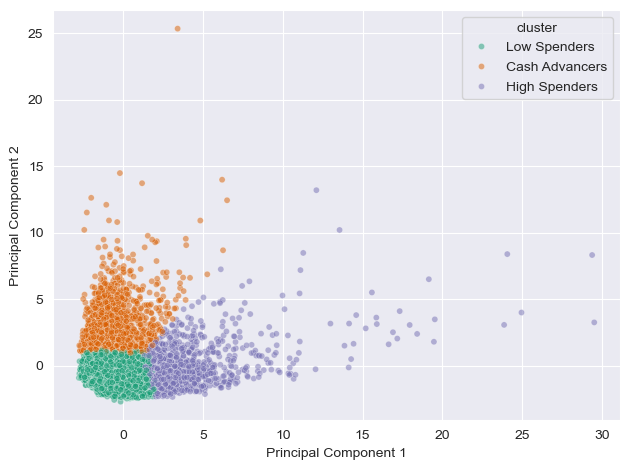

In [52]:
sns.scatterplot(data= df_pca, x="PC1", y="PC2", s=20, alpha=0.5,
           hue="cluster", palette="Dark2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.savefig("grouped_pca.svg")
plt.show()

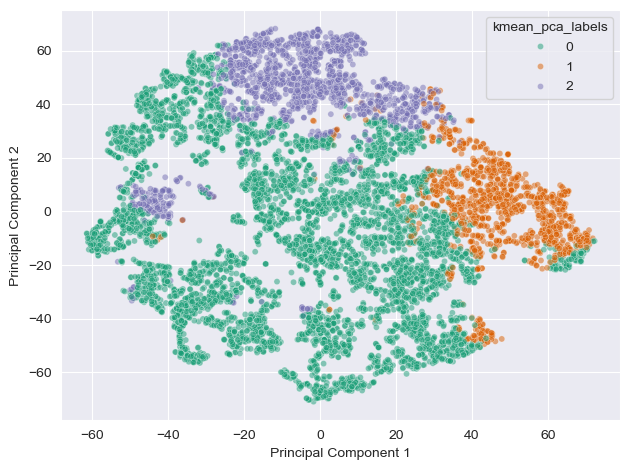

In [29]:
sns.scatterplot(data= df_tsne, x="PC1", y="PC2", s=20, alpha=0.5,
           hue="kmean_pca_labels", palette="Dark2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

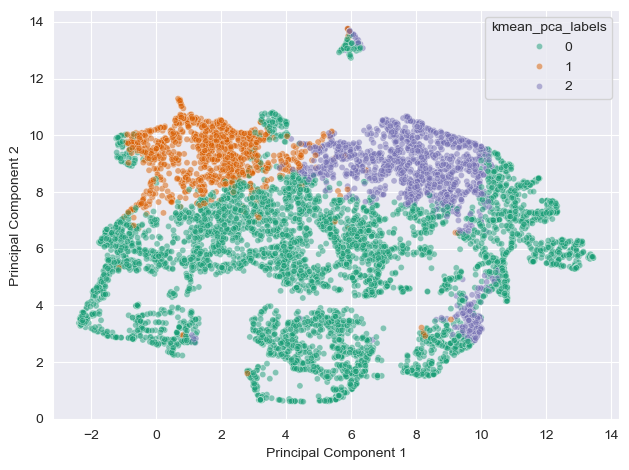

In [30]:
sns.scatterplot(data= df_umap, x="PC1", y="PC2", s=20, alpha=0.5,
           hue="kmean_pca_labels", palette="Dark2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## Add clusters to orignal df
plot features grouped by cluster

In [14]:
## add cluster assigments from k means with 3 clusters
df["kmeans_cluster"]= pipe_pca_kmean.named_steps["cluster"].labels_
df_features= df.drop("customer_id", axis="columns")
df_features.head()

balance_account  purchases_amount  paid_advance  full_purchases  \
0         9.298409            107.60      0.000000            0.00   
1        52.666422            150.30      0.000000            0.00   
2      1360.795674              0.00    462.861443            0.00   
3      2021.641161            363.18      0.000000          363.18   
4        22.322374             95.00   1162.045833           95.00   

   balance_frequency_update  installments  purchases_frequency  \
0                  0.909091         107.6             0.909091   
1                  1.000000         150.3             1.000000   
2                  1.000000           0.0             0.000000   
3                  1.000000           0.0             1.000000   
4                  0.363636           0.0             0.083333   

   full_purchases_frequency  purchases_installments_frequency  \
0                  0.000000                          0.818182   
1                  0.000000                          0.833333   
2                  0.000000                          0.000000   
3                  1.000000                          0.000000   
4                  0.083333                          0.000000   

   cash_advance_frequency  ...  credit_limit  fixed_rate_period     payments  \
0                0.000000  ...        1000.0                 11    89.868853   
1                0.000000  ...        1000.0                  6    54.722514   
2                0.272727  ...        1500.0                 11   303.031979   
3                0.000000  ...        2000.0                 12   704.240770   
4                0.166667  ...        2500.0                 12  4094.261427   

   min_payments  full_payment_prc  payment_ratio         CUR  \
0     89.711672          0.428571       1.001752    0.929841   
1     82.955180          0.000000       0.659664    5.266642   
2    443.781316          0.000000       0.682841   90.719712   
3    795.859808          0.000000       0.884880  101.082058   
4     40.142262          0.000000     101.993790    0.892895   

   avg_purchase_amt  full_payment_ratio  kmeans_cluster  
0         10.760000            0.004286               0  
1         25.050000            0.000000               0  
2          0.000000            0.000000               0  
3         27.936923            0.000000               0  
4         95.000000            0.000000               0  

[5 rows x 22 columns]

In [33]:
def plot_box_facets(df, grouping_column, rotation=45):
    """
    Groups a DataFrame by a specified column and plots box plots of each feature
    in a facet grid, with rotated x-axis labels.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        grouping_column (str): The column to group by.
        rotation (int, optional): The rotation angle for x-axis labels. Defaults to 45.
    """

    feature_columns = [col for col in df.columns if col != grouping_column]

    melted_df = pd.melt(df, id_vars=grouping_column, value_vars=feature_columns,
                        var_name='feature', value_name='value')

    g = sns.FacetGrid(melted_df, col='feature', col_wrap=3, sharey=False)
    
    # Corrected mapping: Set the x-axis to the categorical grouping variable
    g.map_dataframe(sns.boxplot, x=grouping_column, y="value", palette="Dark2")

    # Rotate x-axis labels properly
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(rotation)
            label.set_horizontalalignment('right')  # Improve readability

    g.fig.tight_layout()

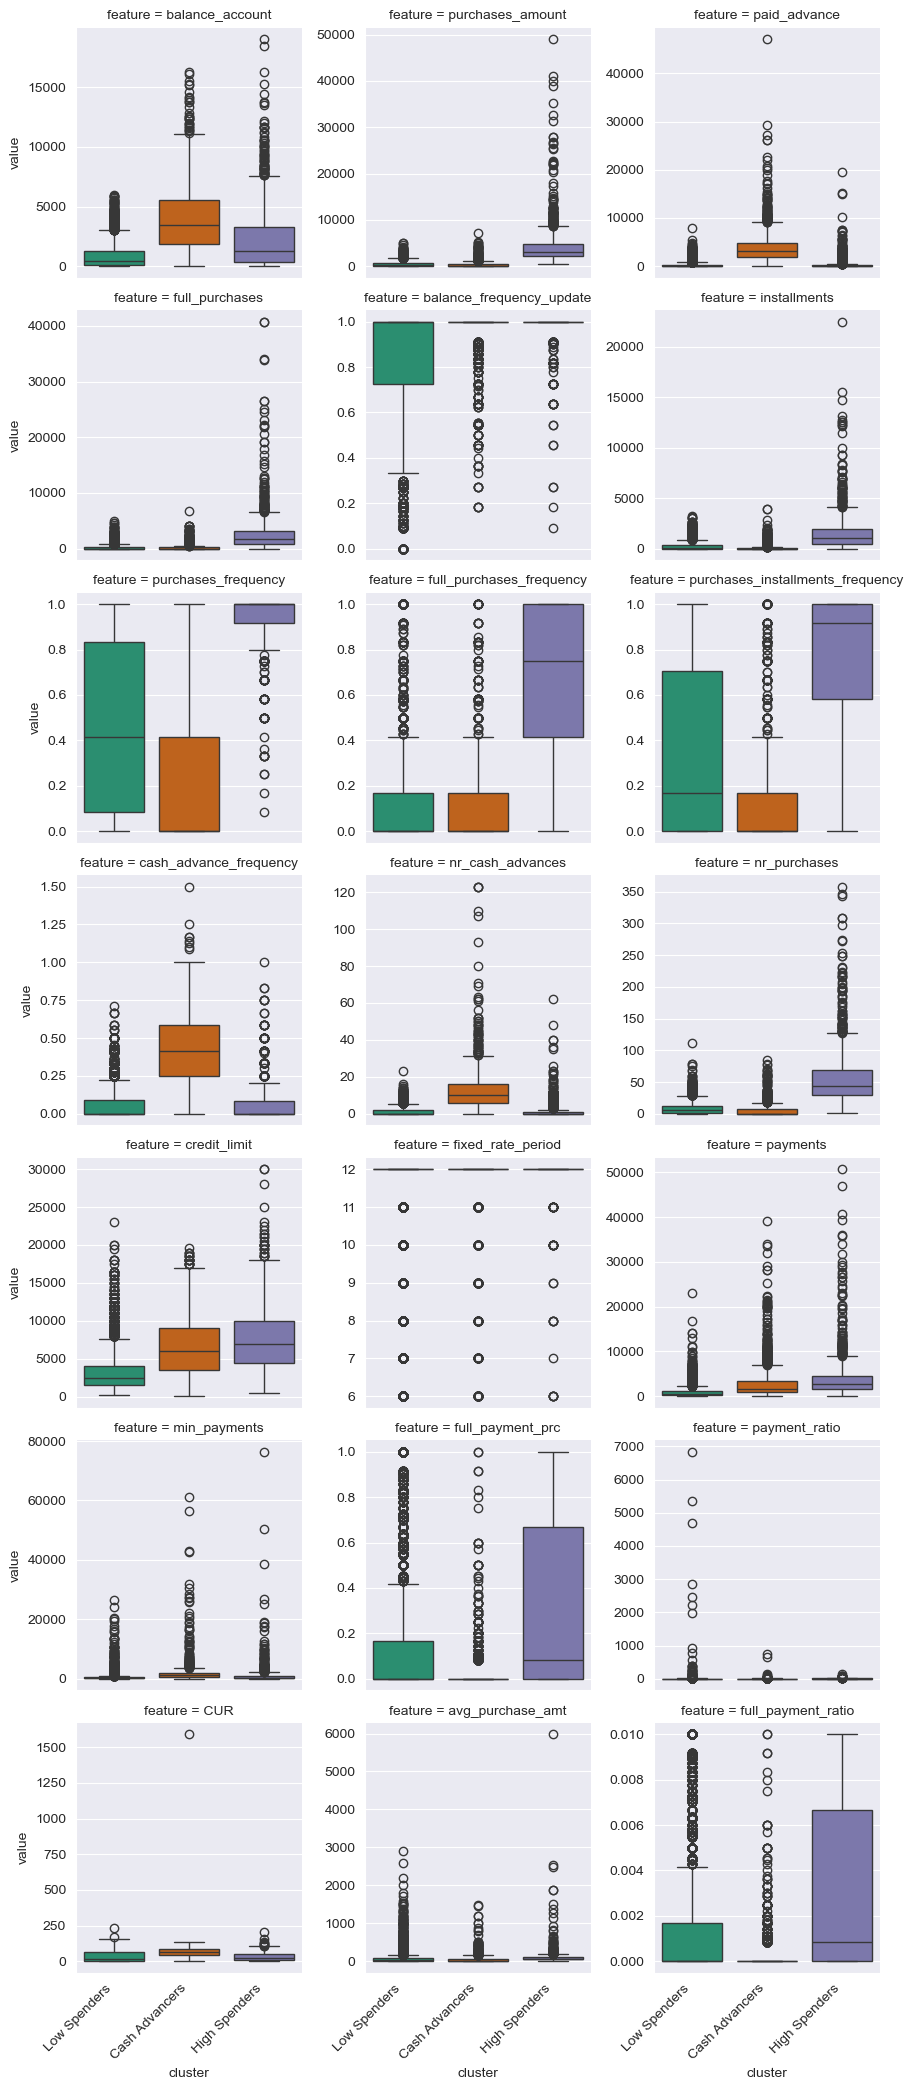

In [18]:
#original df
plot_box_facets(df_features, "kmeans_cluster")

In [15]:
## add cluster names after visualzing features grouped by cluster
cluster_mapping = {
    0: "Low Spenders",
    1: "High Spenders",
    2: "Cash Advancers"
}

df_features["cluster"] = df_features["kmeans_cluster"].map(cluster_mapping)
df_features.drop("kmeans_cluster", axis= "columns", inplace=True)

In [16]:
df_features["cluster"].value_counts()

cluster
Low Spenders      5816
Cash Advancers    1519
High Spenders     1165
Name: count, dtype: int64

### Replace outliers with NA to try to improve visualization of differences between groups

In [19]:
from scipy import stats

def replace_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
    return df

In [29]:
## loop through all relevant columns in merged df and apply replace_outliers_iqr function

for col in df_features.columns:
    # Skip the 'Class' column (Expected) and Id column
    if col == 'cluster':
        continue
    df_features_outliers = replace_outliers_iqr(df_features, col)
df_features_outliers.head()

balance_account  purchases_amount  paid_advance  full_purchases  \
0         9.298409            107.60      0.000000            0.00   
1        52.666422            150.30      0.000000            0.00   
2      1360.795674              0.00    462.861443            0.00   
3      2021.641161            363.18      0.000000          363.18   
4        22.322374             95.00   1162.045833           95.00   

   balance_frequency_update  installments  purchases_frequency  \
0                       NaN         107.6             0.909091   
1                       1.0         150.3             1.000000   
2                       1.0           0.0             0.000000   
3                       1.0           0.0             1.000000   
4                       NaN           0.0             0.083333   

   full_purchases_frequency  purchases_installments_frequency  \
0                  0.000000                          0.818182   
1                  0.000000                          0.833333   
2                  0.000000                          0.000000   
3                       NaN                          0.000000   
4                  0.083333                          0.000000   

   cash_advance_frequency  ...  credit_limit  fixed_rate_period    payments  \
0                0.000000  ...        1000.0                NaN   89.868853   
1                0.000000  ...        1000.0                NaN   54.722514   
2                0.272727  ...        1500.0                NaN  303.031979   
3                0.000000  ...        2000.0               12.0  704.240770   
4                0.166667  ...        2500.0               12.0         NaN   

   min_payments  full_payment_prc  payment_ratio         CUR  \
0     89.711672               NaN       1.001752    0.929841   
1     82.955180               0.0       0.659664    5.266642   
2    443.781316               0.0       0.682841   90.719712   
3    795.859808               0.0       0.884880  101.082058   
4     40.142262               0.0            NaN    0.892895   

   avg_purchase_amt  full_payment_ratio       cluster  
0         10.760000                 NaN  Low Spenders  
1         25.050000                 0.0  Low Spenders  
2          0.000000                 0.0  Low Spenders  
3         27.936923                 0.0  Low Spenders  
4         95.000000                 0.0  Low Spenders  

[5 rows x 22 columns]

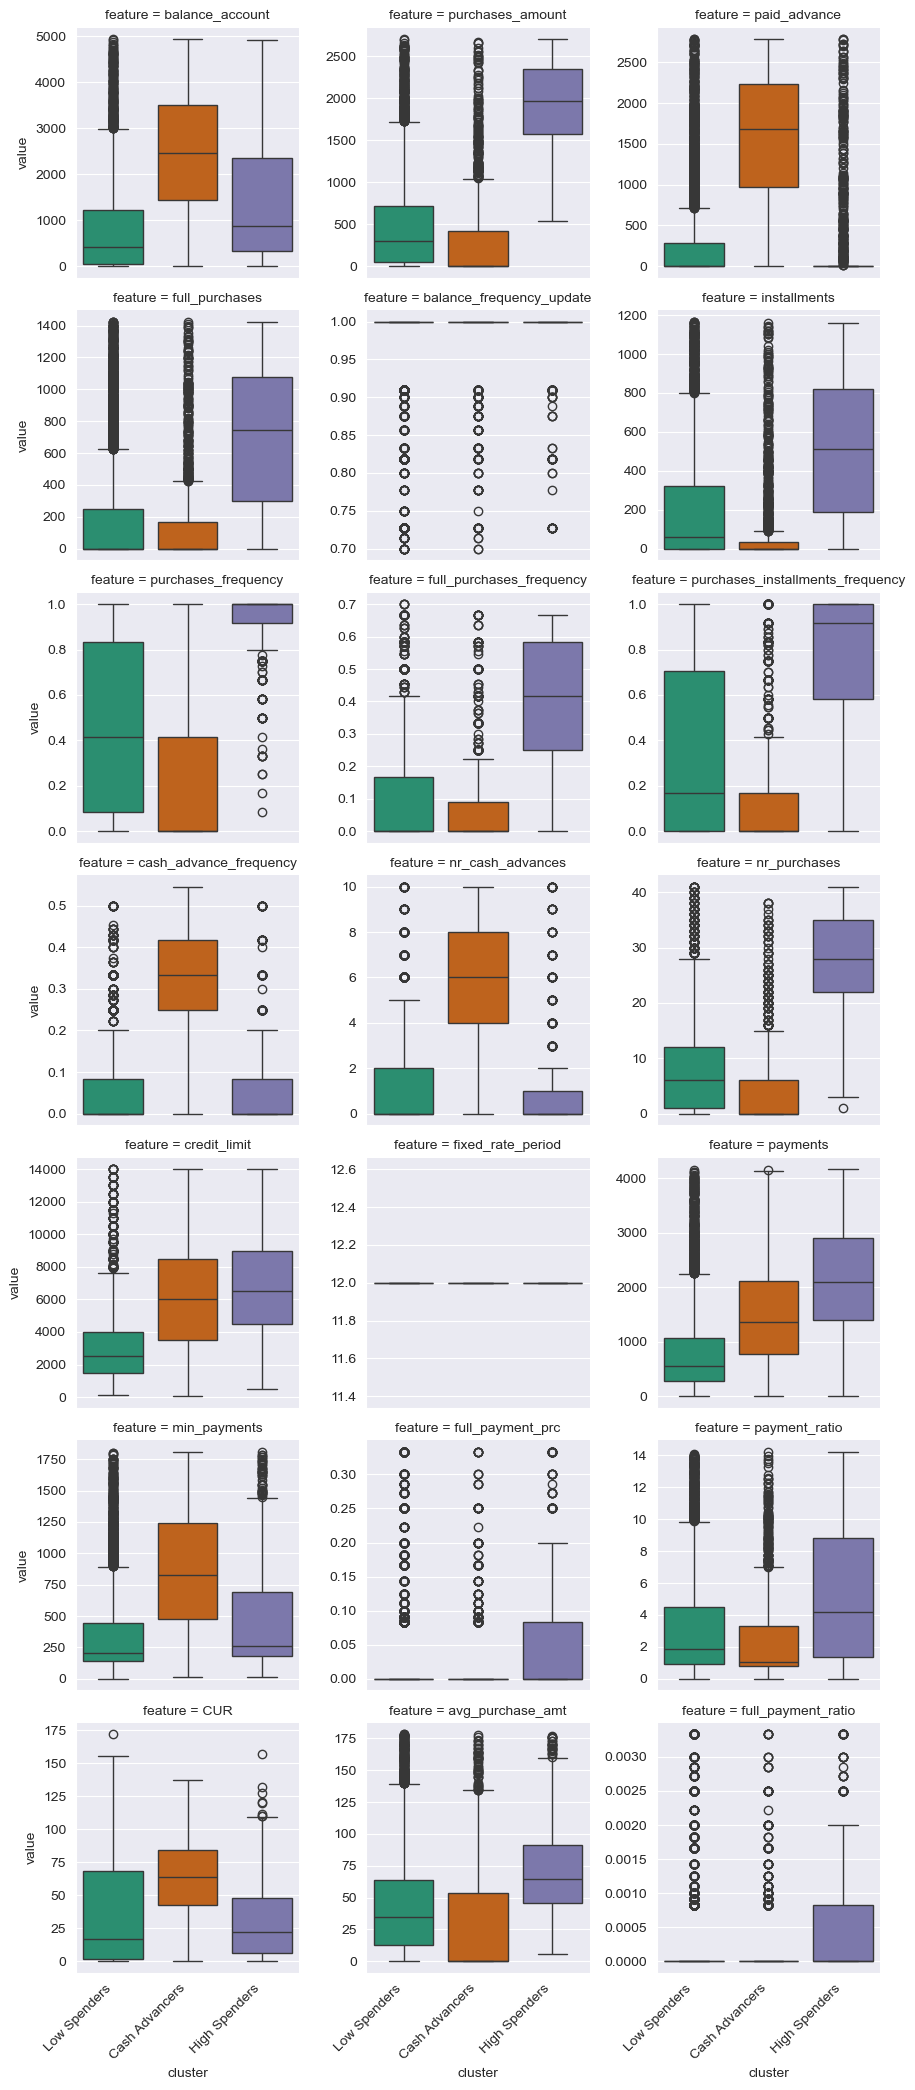

In [21]:
#original df with outliers removed and replaced with NA
plot_box_facets(df_features_outliers, "cluster")
#plt.savefig("grouped_features_no_outliers.svg")

In [30]:
# only plot feature that differ between clusters
segmented_features= ["balance_account", "purchases_amount", "paid_advance", "full_purchases", "installments",
                    "purchases_frequency", "full_purchases_frequency", "purchases_installments_frequency",
                    "cash_advance_frequency", "nr_cash_advances", "nr_purchases", "credit_limit", "payments",
                    "min_payments", "payment_ratio", "CUR", "avg_purchase_amt", "cluster"]

## selected features for presentation
example_features= ["purchases_amount", "purchases_frequency", "credit_limit", "cash_advance_frequency", "CUR",
                  "cluster"]

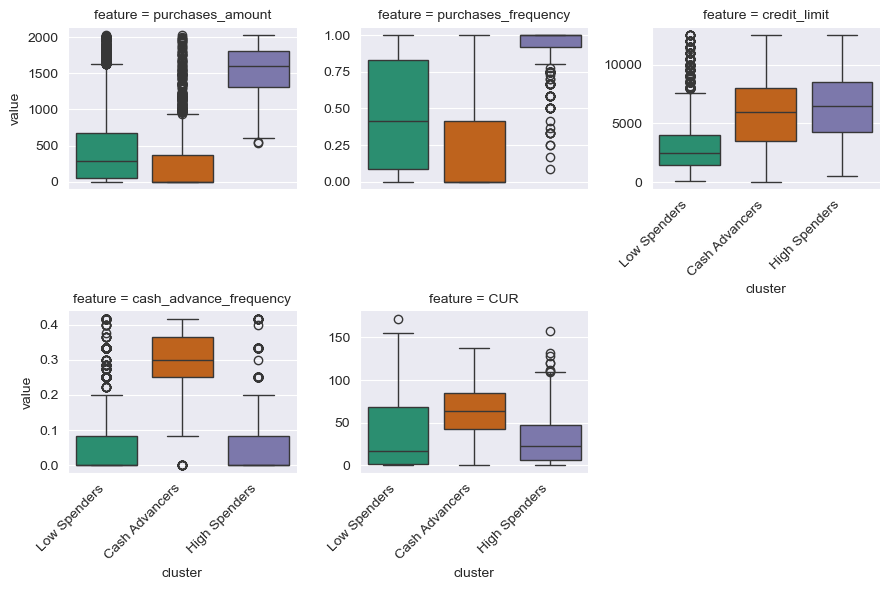

In [34]:
plot_box_facets(df_features_outliers[example_features], "cluster")
plt.savefig("example_features.svg")

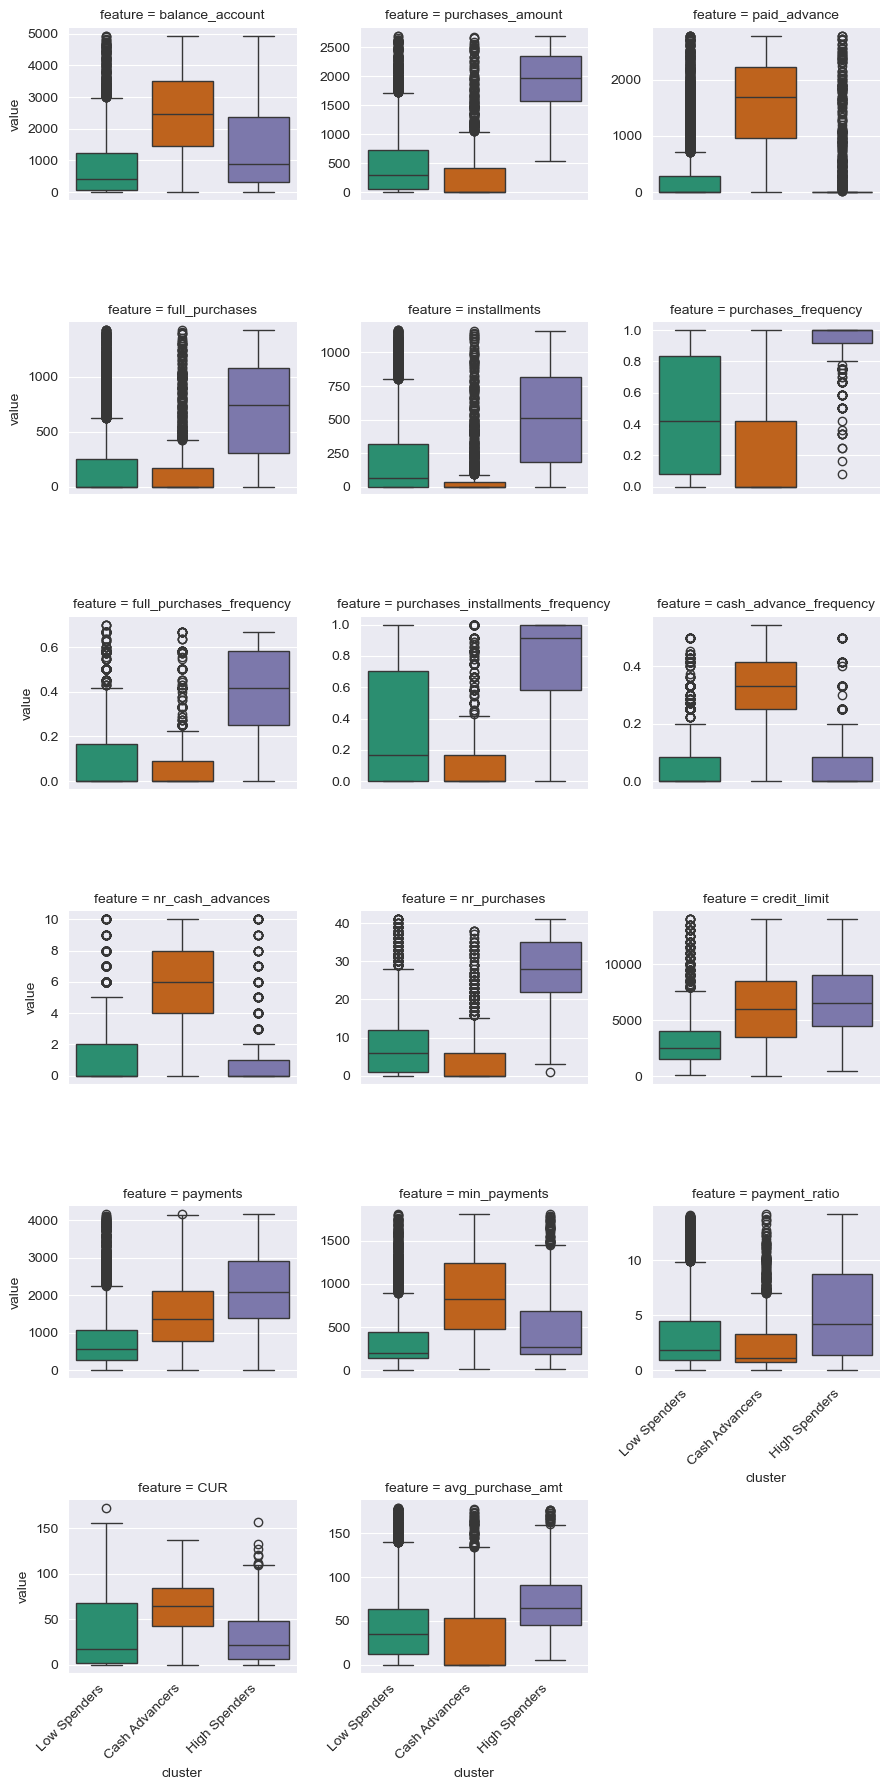

In [25]:
plot_box_facets(df_features_outliers[segmented_features], "cluster")
#plt.savefig("grouped_features_no_outliers.svg")

### Plotting analysis with 4 clusters

In [223]:
def plot_violin_facets(df, grouping_column, inner="quartiles"):
    """
    Groups a DataFrame by a specified column and plots violin plots of each feature
    in a facet grid.

    Groups a DataFrame by a specified column and plots violin plots of each feature
    in a facet grid, with custom violin color, alpha, and boxplot control.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        grouping_column (str): The column to group by.
        inner (str): The representation of the data within the violin. Options:
            "box": Draw a miniature boxplot.
            "quartiles": Draw the quartiles of the distribution.
            "point" or "stick": Show each underlying datapoint.
            None: Draw only the violin's outline.
    """

    # Get the list of columns to plot (excluding the grouping column)
    feature_columns = [col for col in df.columns if col != grouping_column]

    # Melt the DataFrame to long format, suitable for seaborn's facet grid
    melted_df = pd.melt(df, id_vars=grouping_column, value_vars=feature_columns,
                        var_name='feature', value_name='value')

    # Create the facet grid
    g = sns.FacetGrid(melted_df, col='feature', col_wrap=3, sharey=False)  # Adjust col_wrap as needed
    g.map(sns.violinplot, grouping_column, 'value', color= "#1b9e77", alpha=0.5, inner=inner)

    # Adjust layout and show the plot
    g.fig.tight_layout()
    plt.show()

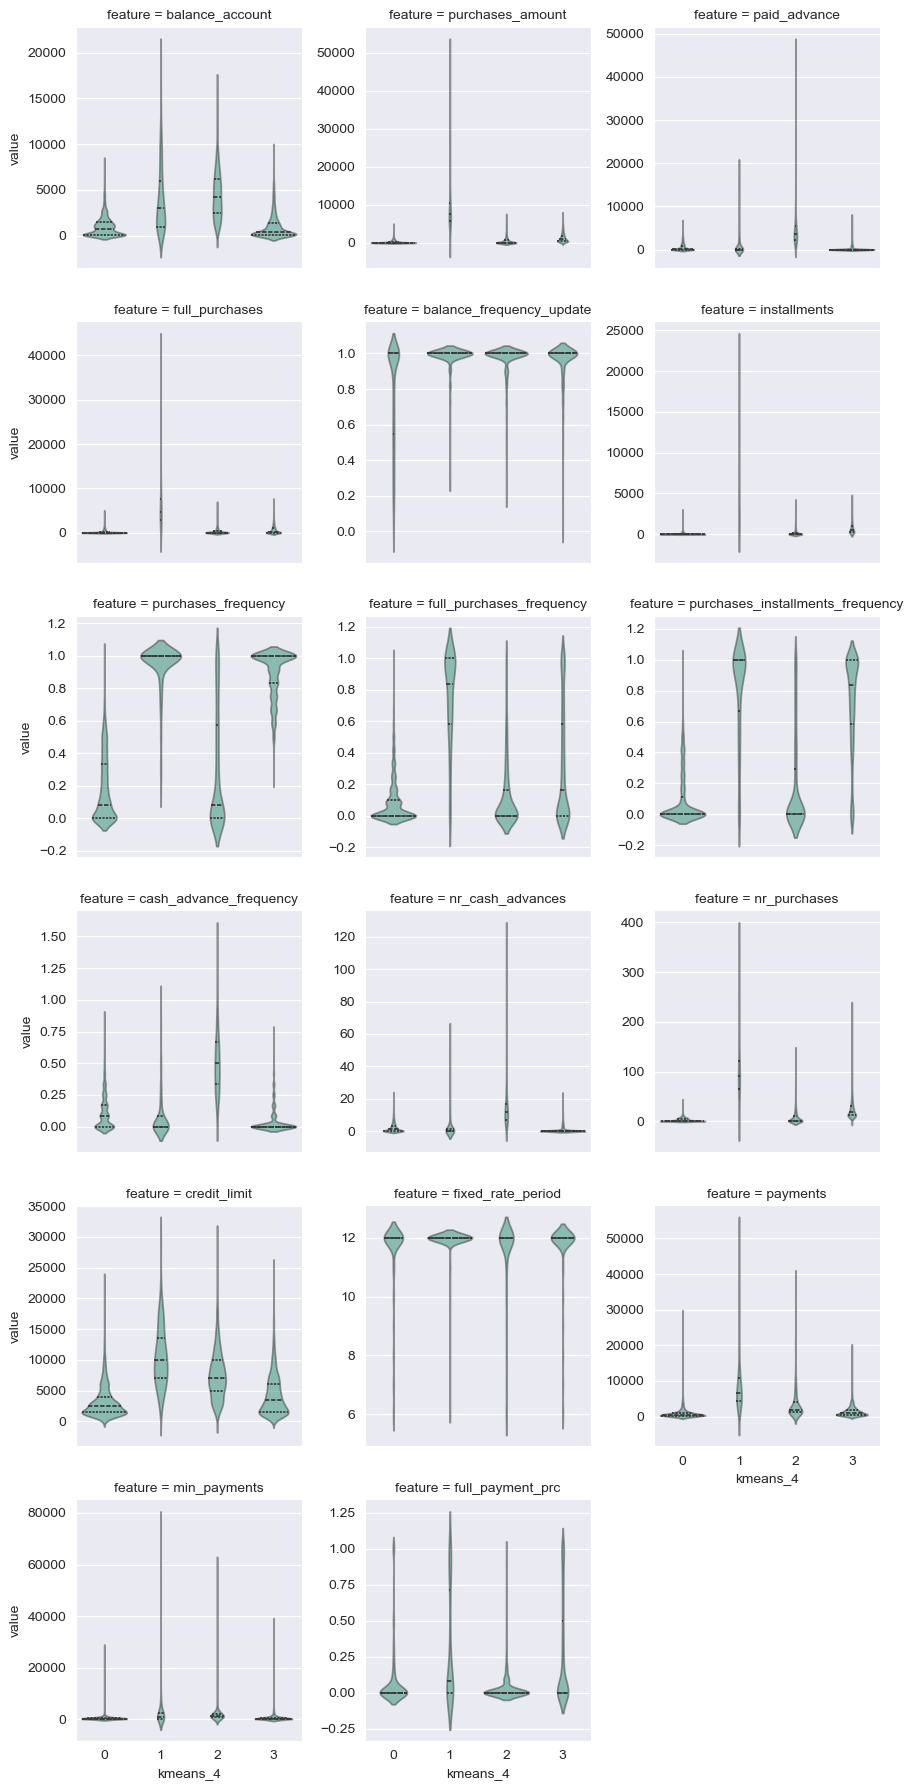

In [229]:
#original df
plot_violin_facets(df_features, "kmeans_4", inner="quartiles")

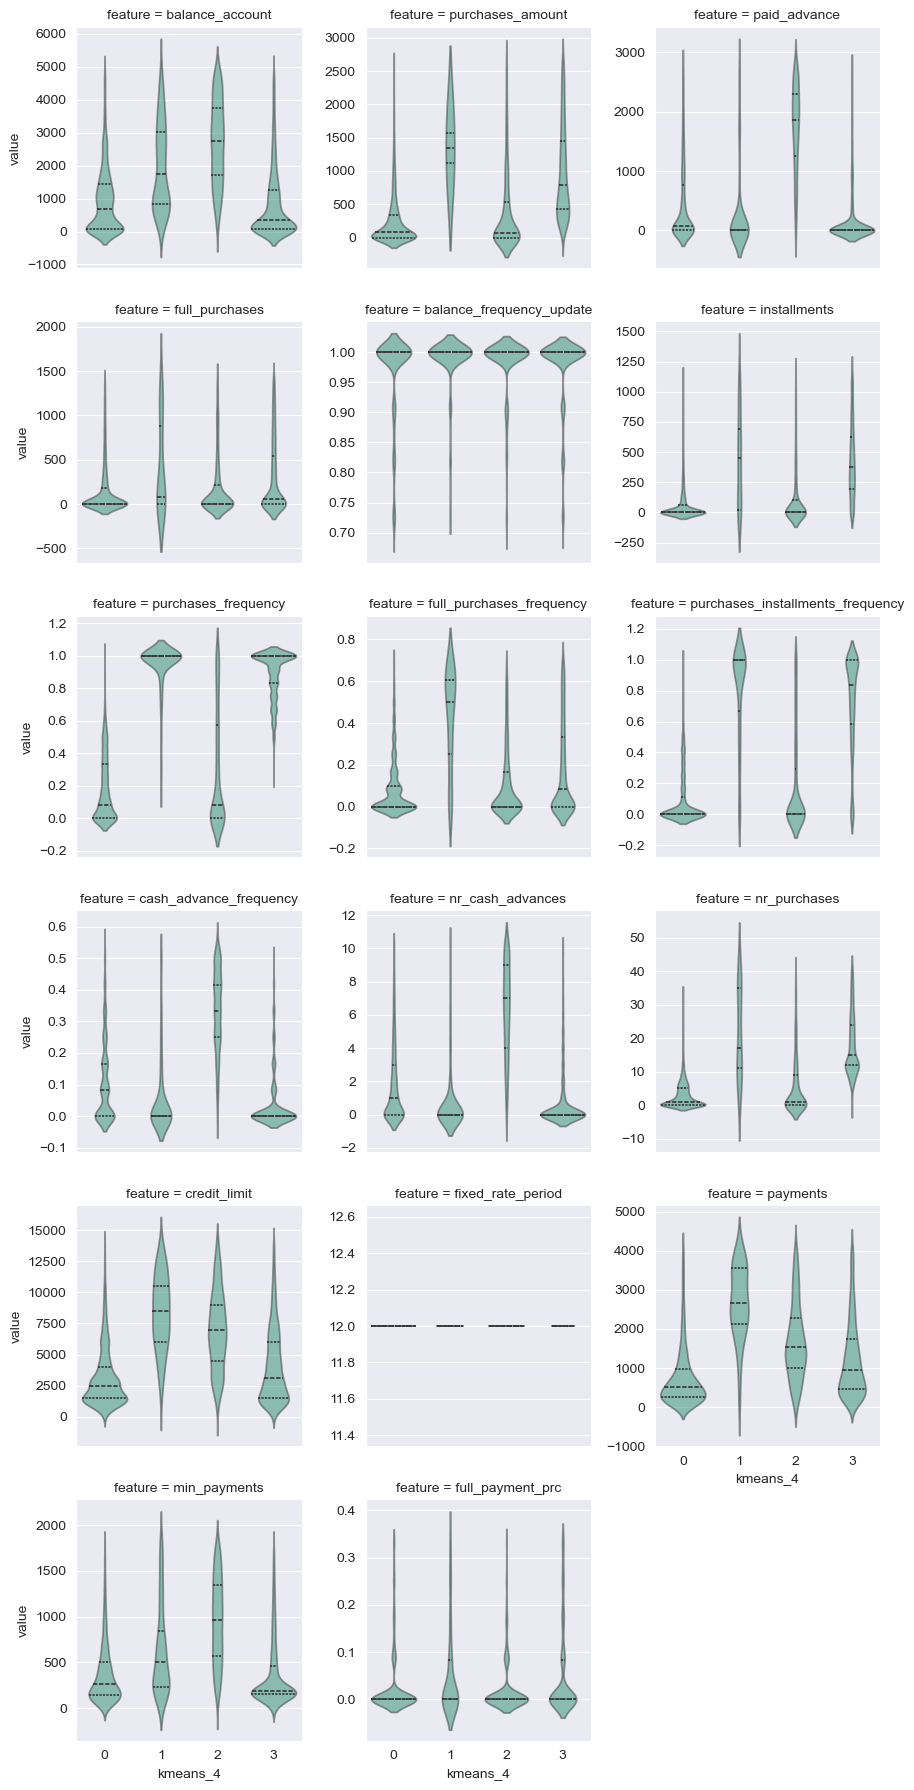

In [249]:
#original df with outliers removed and replaced with NA
plot_violin_facets(df_features_outliers, "kmeans_4", inner="quartiles")

In [243]:
df_scaled["kmeans_4"]= pipe_pca_kmean.named_steps["cluster"].labels_
df_scaled.head()

balance_account  purchases_amount  paid_advance  full_purchases  \
0        -0.744666         -0.414083     -0.468389       -0.352328   
1        -0.723920         -0.394260     -0.468389       -0.352328   
2        -0.098138         -0.464035     -0.245690       -0.352328   
3         0.217997         -0.295433     -0.468389       -0.134773   
4        -0.738436         -0.419933      0.090712       -0.295420   

   balance_frequency_update  installments  purchases_frequency  \
0                  0.138183     -0.334153             1.046519   
1                  0.520953     -0.287234             1.273196   
2                  0.520953     -0.452383            -1.220250   
3                  0.520953     -0.452383             1.273196   
4                 -2.158437     -0.452383            -1.012464   

   full_purchases_frequency  purchases_installments_frequency  \
0                 -0.678245                          1.144149   
1                 -0.678245                          1.182300   
2                 -0.678245                         -0.916043   
3                  2.680406                         -0.916043   
4                 -0.398359                         -0.916043   

   cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
0               -0.673477         -0.474675     -0.187082     -0.960396   
1               -0.673477         -0.474675     -0.347081     -0.960396   
2                0.684186          0.400665     -0.587080     -0.822633   
3               -0.673477         -0.474675     -0.067082     -0.684869   
4                0.156208         -0.037005     -0.547080     -0.547106   

   fixed_rate_period  payments  min_payments  full_payment_prc  kmeans_4  
0          -0.385438 -0.563901     -0.322001          0.946810         3  
1          -4.119450 -0.576049     -0.324877         -0.523476         3  
2          -0.385438 -0.490219     -0.171277         -0.523476         0  
3           0.361364 -0.351538     -0.021400         -0.523476         3  
4           0.361364  0.820251     -0.343102         -0.523476         0

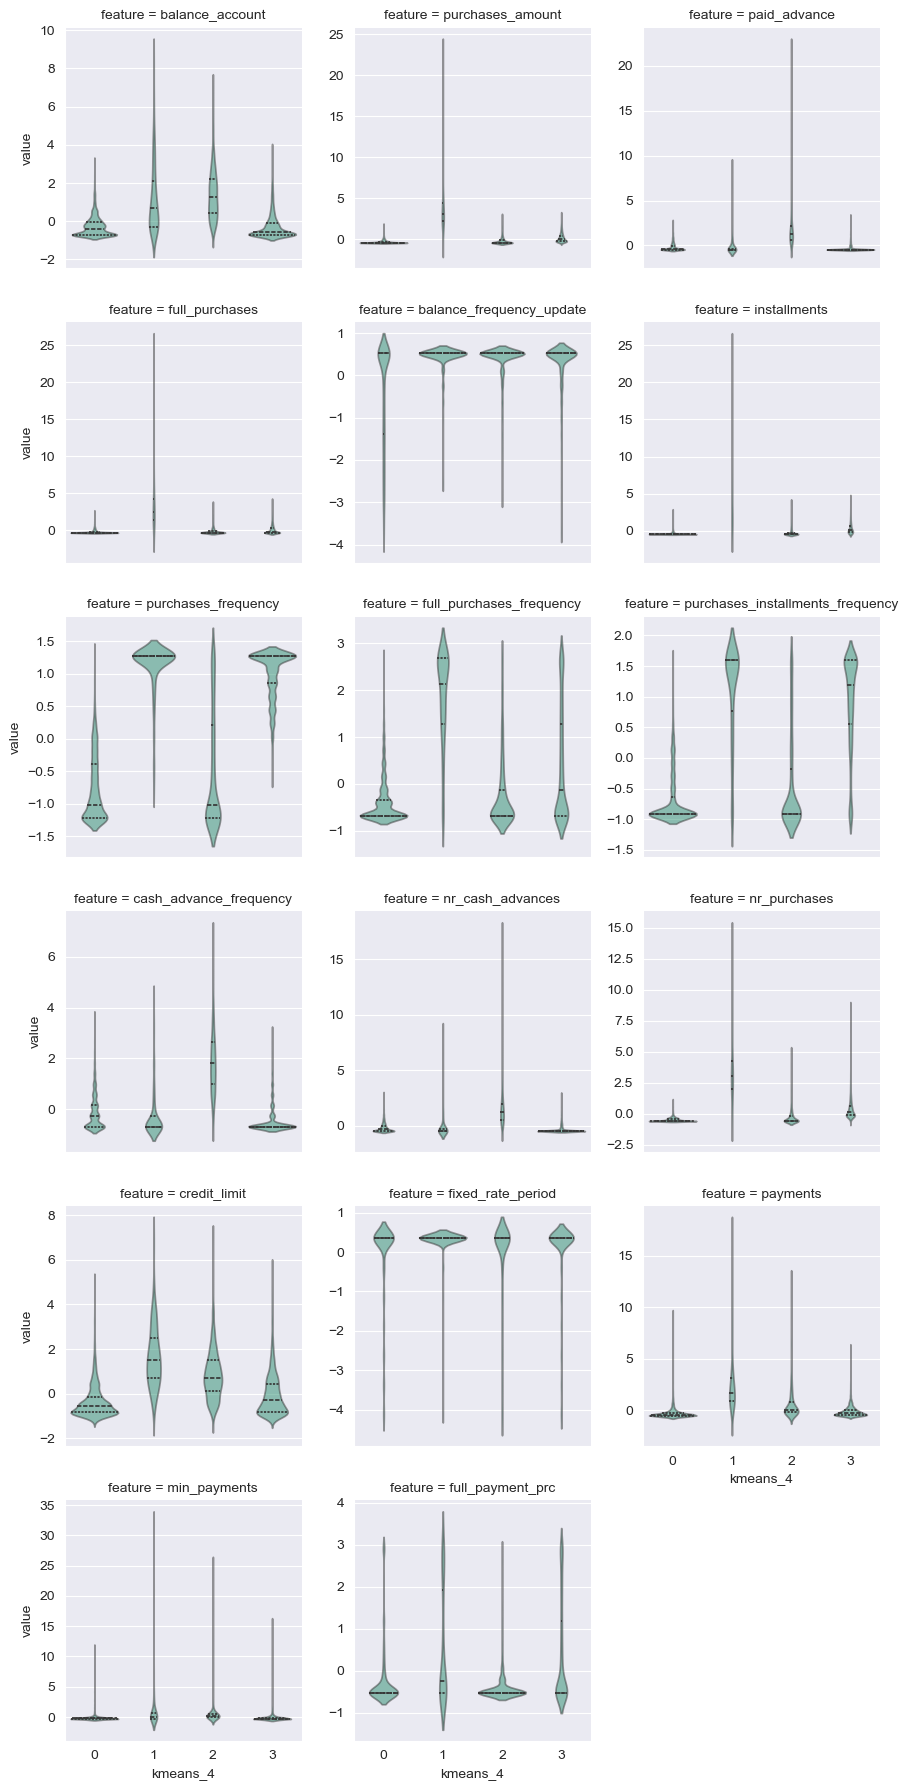

In [244]:
#scaled df (StandardScaler())
plot_violin_facets(df_scaled, "kmeans_4", inner="quartiles")

# DBSCAN for clustering

In [83]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [99]:
db = DBSCAN(eps=0.5, min_samples=10).fit(data_scaled)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 6879


In [97]:
## label of -1 indicates a noise point
df_tsne["db_labels"]= labels
df_tsne.head()

PC1        PC2  db_labels
0  11.194663 -43.156960         -1
1  -0.158530 -44.507954         -1
2 -34.165115  45.145531         -1
3  19.686682  10.877141         -1
4 -40.444847 -26.735241         -1

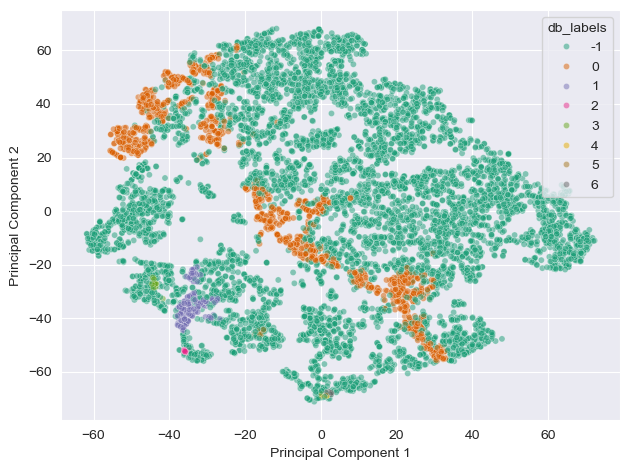

In [98]:
sns.scatterplot(data= df_tsne, x="PC1", y="PC2", s=20, alpha=0.5,
           hue="db_labels", palette="Dark2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [149]:
pipe_pca_db = Pipeline(
        [
            #("scl", StandardScaler()),
            ("pca", sklearnPCA(0.95)),
            ("cluster", DBSCAN(eps=.9, min_samples=13))]
    )
db_pca= pipe_pca_db.fit(data_scaled)
# Access the labels_ from the DBSCAN step
db_pca_labels = db_pca.named_steps['cluster'].labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_pca_labels)) - (1 if -1 in db_pca_labels else 0)
n_noise_ = list(db_pca_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 3708


In [150]:
df_umap["db_pca_labels"]= db_pca_labels
df_umap.head()

PC1        PC2  db_pca_labels
0   0.425172   4.427410              0
1   0.443990   2.674126             -1
2   9.296197   5.028604              0
3   3.968133  10.431515              0
4  10.139967   5.651169              0

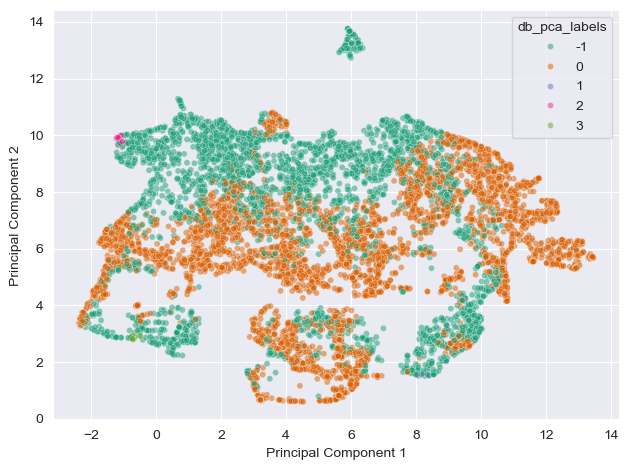

In [151]:
sns.scatterplot(data= df_umap, x="PC1", y="PC2", s=20, alpha=0.5,
           hue="db_pca_labels", palette="Dark2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [163]:
pipe_umap_db = Pipeline(
        [
            #("scl", StandardScaler()),
            ("UMAP", umap.UMAP(n_neighbors=30, n_components=100,  min_dist= 0.3, init='random')),
            ("cluster", DBSCAN(eps=0.4, min_samples=11))]
    )
db_umap= pipe_umap_db.fit(data_scaled)
# Access the labels_ from the DBSCAN step
db_umap_labels = db_umap.named_steps['cluster'].labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_umap_labels)) - (1 if -1 in db_umap_labels else 0)
n_noise_ = list(db_umap_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 36
Estimated number of noise points: 1610


In [157]:
df_umap["db_umap_labels"]= db_umap_labels
df_umap.head()

PC1        PC2  db_pca_labels  db_umap_labels
0   0.425172   4.427410              0              -1
1   0.443990   2.674126             -1               0
2   9.296197   5.028604              0              -1
3   3.968133  10.431515              0               1
4  10.139967   5.651169              0               2

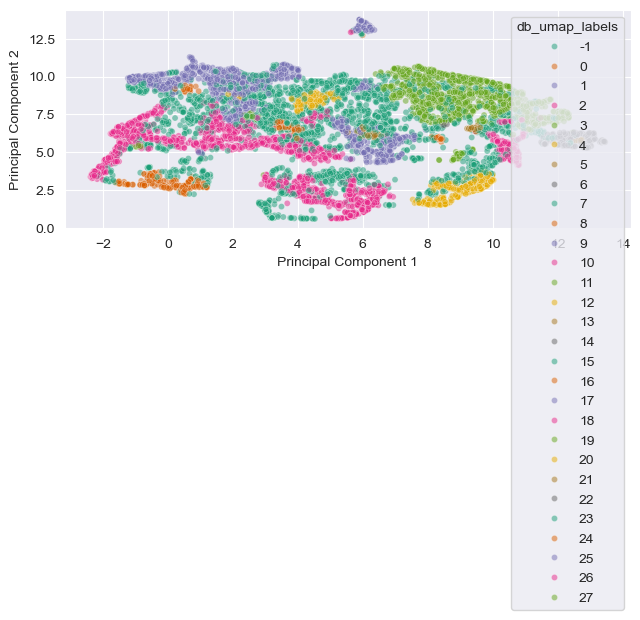

In [158]:
sns.scatterplot(data= df_umap, x="PC1", y="PC2", s=20, alpha=0.5,
           hue="db_umap_labels", palette="Dark2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()